# Analysis of exports and imports of sheep and goats in Ireland.

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import scipy.stats as stats
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy as sp
import researchpy as rp

# EU trade since 2002 by CPA 2.1

# IMPORT 

In [2]:
# IMPORTING THE EU trade since 2002 by CPA 2.1
df1 = pd.read_csv('IMPORT.gz')
df1.head()

,DATAFLOW,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BE,IE,145,1,VALUE_IN_EUROS,2017,47476,NaN
1,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BE,IE,145,1,VALUE_IN_EUROS,2018,157223,NaN
2,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BE,IE,145,1,VALUE_IN_EUROS,2019,1460957,NaN
3,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BE,IE,145,1,VALUE_IN_EUROS,2020,147652,NaN
4,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,BG,IE,145,1,VALUE_IN_EUROS,2020,114552,NaN


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     24 non-null     object 
 1   LAST UPDATE  24 non-null     object 
 2   freq         24 non-null     object 
 3   reporter     24 non-null     object 
 4   partner      24 non-null     object 
 5   product      24 non-null     int64  
 6   flow         24 non-null     int64  
 7   indicators   24 non-null     object 
 8   TIME_PERIOD  24 non-null     int64  
 9   OBS_VALUE    24 non-null     int64  
 10  OBS_FLAG     0 non-null      float64
dtypes: float64(1), int64(4), object(6)
memory usage: 2.2+ KB


In [4]:
df_imp= df1.drop(columns=['DATAFLOW', 'LAST UPDATE','freq','OBS_FLAG'])
df_imp.head()

,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE
0,BE,IE,145,1,VALUE_IN_EUROS,2017,47476
1,BE,IE,145,1,VALUE_IN_EUROS,2018,157223
2,BE,IE,145,1,VALUE_IN_EUROS,2019,1460957
3,BE,IE,145,1,VALUE_IN_EUROS,2020,147652
4,BG,IE,145,1,VALUE_IN_EUROS,2020,114552


In [5]:
df_imp['reporter'].describe()

count     24
unique     9
top       FR
freq       5
Name: reporter, dtype: object

In [6]:
rp.summary_cat(df_imp['reporter'])

,Variable,Outcome,Count,Percent
0,reporter,FR,5,20.83
1,,NL,5,20.83
2,,BE,4,16.67
3,,IT,4,16.67
4,,DE,2,8.33
5,,BG,1,4.17
6,,ES,1,4.17
7,,HU,1,4.17
8,,RO,1,4.17


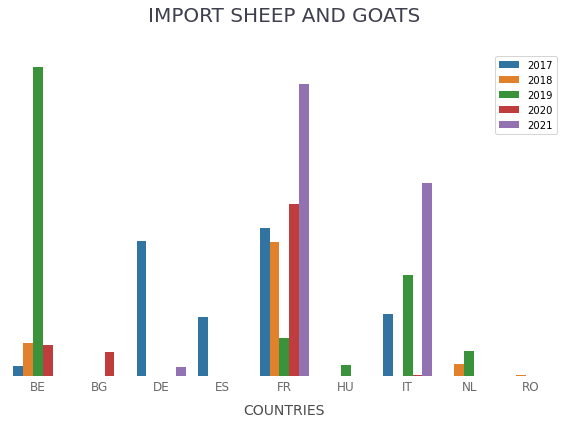

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='reporter', y='OBS_VALUE', hue='TIME_PERIOD', data = df_imp, ax=ax) 

ax.set_frame_on(False)
ax.set_title('IMPORT SHEEP AND GOATS', loc='center', pad=30, fontdict={'fontsize':20}, 
             color='#3f3f4e') 

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c')
ax.legend(loc="upper right");

plt.tight_layout();

In [8]:
# Finding some statistics by a grouping categorical variable:
df_imp = df_imp.groupby('TIME_PERIOD', axis = 0).median()
df_imp

,product,flow,OBS_VALUE
TIME_PERIOD,,,
2017,145.0,1.0,286478.0
2018,145.0,1.0,108618.0
2019,145.0,1.0,178928.0
2020,145.0,1.0,114552.0
2021,145.0,1.0,476879.5


# EXPORT

In [9]:
# IMPORTING THE EU trade since 2002 by CPA 2.1
df2 = pd.read_csv('EXPORT.gz')
df2.head(2)

,DATAFLOW,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,DE,IE,145,2,VALUE_IN_EUROS,2021,21613,NaN
1,ESTAT:DS-059268(1.0),16/12/22 11:00:00,A,DK,IE,145,2,VALUE_IN_EUROS,2021,28990,NaN


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     15 non-null     object 
 1   LAST UPDATE  15 non-null     object 
 2   freq         15 non-null     object 
 3   reporter     15 non-null     object 
 4   partner      15 non-null     object 
 5   product      15 non-null     int64  
 6   flow         15 non-null     int64  
 7   indicators   15 non-null     object 
 8   TIME_PERIOD  15 non-null     int64  
 9   OBS_VALUE    15 non-null     int64  
 10  OBS_FLAG     0 non-null      float64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.4+ KB


In [11]:
print(df2['reporter'].unique())

['DE' 'DK' 'FR' 'IT' 'NL' 'RO' 'SE']


In [12]:
df_exp= df2.drop(columns=['DATAFLOW', 'LAST UPDATE','freq','OBS_FLAG'])
df_exp.head()

,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE
0,DE,IE,145,2,VALUE_IN_EUROS,2021,21613
1,DK,IE,145,2,VALUE_IN_EUROS,2021,28990
2,FR,IE,145,2,VALUE_IN_EUROS,2017,30129
3,FR,IE,145,2,VALUE_IN_EUROS,2019,10647
4,FR,IE,145,2,VALUE_IN_EUROS,2020,25821


In [13]:
df_exp['reporter'].describe()

count     15
unique     7
top       NL
freq       5
Name: reporter, dtype: object

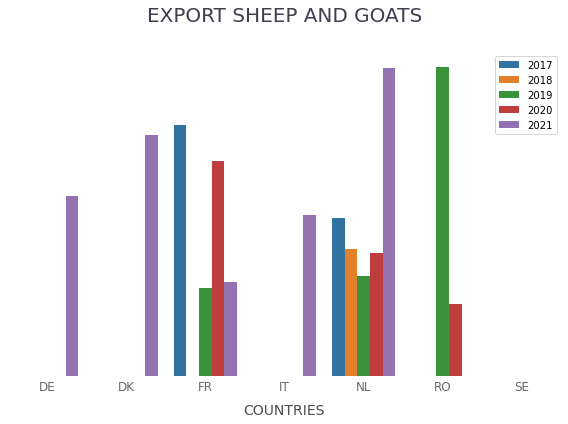

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='reporter', y='OBS_VALUE', hue='TIME_PERIOD', data = df_exp, ax=ax) 

ax.set_frame_on(False)
ax.set_title('EXPORT SHEEP AND GOATS', loc='center', pad=30, fontdict={'fontsize':20}, 
             color='#3f3f4e') 

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c')
ax.legend(loc="upper right");

plt.tight_layout();

In [15]:
# Finding some statistics by a grouping categorical variable:
df_exp = df_exp.groupby('TIME_PERIOD', axis = 0).median()
df_exp

,product,flow,OBS_VALUE
TIME_PERIOD,,,
2017,145.0,2.0,24570.5
2018,145.0,2.0,7660.0
2019,145.0,2.0,11988.0
2020,145.0,2.0,14808.0
2021,145.0,2.0,21613.0


# Import Ireland

In [21]:
def get_trade(state, flow):
    filename = f'trade_{flow}_{state}.zip'
    if os.path.exists(filename) == False:
        df = pd.read_json(f'https://ec.europa.eu/agrifood/api/taxud/weeklyData/{flow}?memberStateCodes={state}&sectors=Sheep')
        df.to_csv(filename, index=False,compression='zip')
        print(f"Data from API save as {filename}")
    else:
        df = pd.read_csv(filename)
        print(f"The file {filename} was read.")
    
    return df

In [22]:
trade_import= get_trade('IE','import')
trade_import.head(2)

The file trade_import_IE.zip was read.


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,4000,100,233,6.94,34,34,1.0
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100010,4000,300,286512,6.83,41966,41966,1.0


In [23]:
trade_import.shape

(967, 17)

In [24]:
print(trade_import['marketingYear'].unique())

[2022 2021 2020 2019 2018 2017 2016 2014 2013 2012 2011]


In [20]:
trade_import = get_trade('IE','import')
print(trade_import['product'].unique())
trade_import.head(2)

The file trade_import_IE.zip was read.
['Preparations' 'Fresh meat' 'Frozen Meat' 'Offals'
 'Salted, dried, smoked meat']


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,4000,100,233,6.94,34,34,1.0
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100010,4000,300,286512,6.83,41966,41966,1.0


# One-way ANOVA

# EXPORT IRELAND   

In [22]:
trade_export = get_trade('IE', 'export')
trade_export.sample(3)

The file trade_export_IE.zip was read.


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
2553,Sheep,2021,6,IE,Ireland,GB,United Kingdom,Fresh meat,2042250,204225000,10,0,24633,7.78,3166,3166,1.0
4238,Sheep,2018,15,IE,Ireland,HK,Hong Kong,Offals,2069099,206909900,10,0,1310,0.72,1820,1820,1.0
756,Sheep,2022,22,IE,Ireland,GH,Ghana,Frozen Meat,2044290,204429000,10,0,28475,1.32,21580,21580,1.0


In [23]:
print(trade_export['partner'].unique())
trade_export.head(10)

['United Kingdom' 'Ivory Coast' 'Canada' 'Singapore' 'Philippines'
 'Switzerland' 'United Arab Emirates' 'Japan' 'Ghana'
 'Trinidad and Tobago' 'Hong Kong' 'United States of America'
 'New Zealand' 'China' 'Qatar' 'Libya'
 'Countries and territories not specified' 'Kuwait' 'South Africa'
 'European Union' 'Cape Verde' 'Australia' 'Vietnam' 'Congo' 'Uganda'
 'Central African Republic' 'Tanzania' 'Ukraine' 'Comoros' 'Gabon'
 'Albania' 'Turkey' 'Liberia' 'Taiwan' 'Norway' 'India' 'Maldives'
 'Lebanon' 'Tunisia' 'Bahrain']


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042300,204230000,10,0,15051,11.87,1268,2295,1.81
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042230,204223000,10,0,9091,3.59,2532,2532,1.00
2,Sheep,2022,52,IE,Ireland,CI,Ivory Coast,Fresh meat,2041000,204100000,10,0,21500,0.86,25000,25000,1.00
3,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042250,204225000,10,0,815,9.59,85,85,1.00
4,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Frozen Meat,2044290,204429000,10,0,15003,5.33,2817,2817,1.00
5,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,10,0,365751,7.56,48390,48390,1.00
6,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100000,10,0,24713,6.37,3881,3881,1.00
7,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042210,204221000,10,0,40128,7.08,5667,5667,1.00
8,Sheep,2022,52,IE,Ireland,CA,Canada,Fresh meat,2042250,204225000,10,0,77950,5.95,13092,13092,1.00
9,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Frozen Meat,2044310,204431000,10,0,44608,4.76,9365,15640,1.67


# PRICE

In [24]:
# getting price by API if the file isn't avaible
def get_prices(state):
    filename = f'price_{state}.zip'
    if os.path.exists(filename) == False:
        df = pd.read_json(f'https://ec.europa.eu/agrifood/api/sheepAndGoat/prices?memberStateCodes={state}')
        df.to_csv(filename, index=False,compression='zip')
        print(f"Data from API save as {filename}")
    else:
        df = pd.read_csv(filename)
        print(f"The file {filename} was read.")
    
    return df

In [25]:
price_IE = get_prices('IE')
price_IE.sample(3)

The file price_IE.zip was read.


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,category,marketName,marketingYear
253,IE,Ireland,29/01/2018,04/02/2018,5,€448.17,100CARC,Heavy Lamb,IE,2018
0,IE,Ireland,05/12/2022,11/12/2022,49,€648.58,100CARC,Heavy Lamb,IE,2022
311,IE,Ireland,19/12/2016,25/12/2016,51,€429.89,100CARC,Heavy Lamb,IE,2016


In [26]:
price_FR = get_prices('FR')
price_FR.head(10)

The file price_FR.zip was read.


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,category,marketName,marketingYear
0,FR,France,12/12/2022,18/12/2022,50,€857.00,100CARC,Heavy Lamb,FR,2022
1,FR,France,05/12/2022,11/12/2022,49,€851.00,100CARC,Heavy Lamb,FR,2022
2,FR,France,28/11/2022,04/12/2022,48,€852.00,100CARC,Heavy Lamb,FR,2022
3,FR,France,21/11/2022,27/11/2022,47,€836.00,100CARC,Heavy Lamb,FR,2022
4,FR,France,14/11/2022,20/11/2022,46,€829.00,100CARC,Heavy Lamb,FR,2022
5,FR,France,07/11/2022,13/11/2022,45,€815.00,100CARC,Heavy Lamb,FR,2022
6,FR,France,31/10/2022,06/11/2022,44,€804.00,100CARC,Heavy Lamb,FR,2022
7,FR,France,24/10/2022,30/10/2022,43,€800.00,100CARC,Heavy Lamb,FR,2022
8,FR,France,17/10/2022,23/10/2022,42,€796.00,100CARC,Heavy Lamb,FR,2022
9,FR,France,10/10/2022,16/10/2022,41,€795.00,100CARC,Heavy Lamb,FR,2022


In [27]:
prices = pd.concat([price_IE,price_FR], keys=['IRELAND', 'FRANCE'])
prices['price'] = (prices['price'].apply(lambda x: re.sub('\D', '', x)).astype('float')/100)
prices.sample(10)

memberStateCode memberStateName   beginDate     endDate  \
FRANCE  133              FR          France  25/05/2020  31/05/2020   
        267              FR          France  30/10/2017  05/11/2017   
IRELAND 203              IE         Ireland  14/01/2019  20/01/2019   
FRANCE  57               FR          France  08/11/2021  14/11/2021   
        329              FR          France  22/08/2016  28/08/2016   
        147              FR          France  17/02/2020  23/02/2020   
        402              FR          France  30/03/2015  05/04/2015   
        186              FR          France  20/05/2019  26/05/2019   
        93               FR          France  01/03/2021  07/03/2021   
IRELAND 212              IE         Ireland  12/11/2018  18/11/2018   

             weekNumber   price     unit    category marketName  marketingYear  
FRANCE  133          22  649.00  100CARC  Heavy Lamb         FR           2020  
        267          44  644.00  100CARC  Heavy Lamb         FR           2017  
IRELAND 203           3  477.71  100CARC  Heavy Lamb         IE           2019  
FRANCE  57           45  777.00  100CARC  Heavy Lamb         FR           2021  
        329          34  642.00  100CARC  Heavy Lamb         FR           2016  
        147           8  639.00  100CARC  Heavy Lamb         FR           2020  
        402          14  680.00  100CARC  Heavy Lamb         FR           2015  
        186          21  620.00  100CARC  Heavy Lamb         FR           2019  
        93            9  699.00  100CARC  Heavy Lamb         FR           2021  
IRELAND 212          46  429.89  100CARC  Heavy Lamb         IE           2018

In [28]:
def graf_his(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list


    print(f'qtd. {a}: ', price_a.shape[0])
    print(f'qtd. {b}: ', price_b.shape[0])

    print(f'média dos preços {a}: ', np.mean(price_a))
    print(f'média dos preços {b}: ', np.mean(price_b))

    ##Visualizando as distribuições
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

    ax0.hist(price_a);
    ax0.set_title(f'Preços 100CARC {a} ({year})');

    ax1.hist(price_b);
    ax1.set_title(f'Preços 100CARC {b} ({year})');

qtd. Ireland:  53
qtd. France:  53
média dos preços Ireland:  517.7201886792453
média dos preços France:  673.811320754717


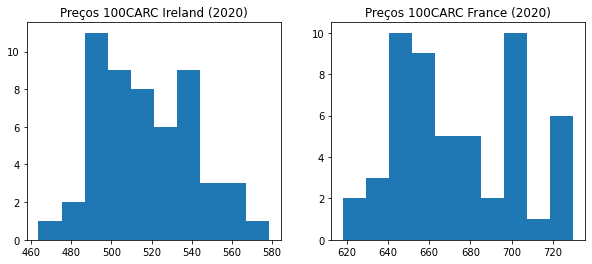

In [29]:
graf_his(prices, 'Ireland', 'France', 2020)

In [30]:
def graf_boxplot(dataframe, a, b, year):
    
    df = dataframe[(dataframe["marketingYear"] == year) &  dataframe['memberStateName'].isin([a,b])] #getting year and coutries

    fig, ax = plt.subplots(figsize=(8,6))
    sns.boxplot(x= 'memberStateName', y= 'price', data = df, ax=ax) 

    ax.set_frame_on(False)
    ax.set_title(f'Prices {a} and {b} ({year})', loc='center', pad=30, fontdict={'fontsize':20}, 
                 color='#3f3f4e') 

    ax.get_yaxis().set_visible(True)
    ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
    ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c')
    ax.set_ylabel('PRICES (€/100CARC)', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c') 

    plt.tight_layout();
    
    plt.show()

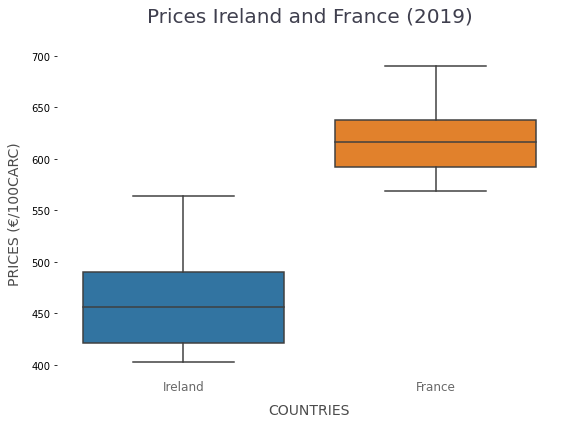

In [31]:
graf_boxplot(prices, 'Ireland', 'France', 2019)

In [32]:
def p_value(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    print(f"p-value da hipótese das tarifas dos homens serem normalmente distribuidos ", stats.normaltest(price_a)[1])
    print(f"p-value da hipótese das tarifas das mulheres serem normalmente distribuidos ", stats.normaltest(price_b)[1])

In [33]:
p_value(prices, 'Ireland', 'France', 2019)

p-value da hipótese das tarifas dos homens serem normalmente distribuidos  0.22107054346749733
p-value da hipótese das tarifas das mulheres serem normalmente distribuidos  0.2379429235433786


In [34]:
def intervalo_conf(dados, significancia=0.95):
    a = 1.0*np.array(dados)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1+significancia)/2., n-1)
    return m-h, m+h

In [35]:
def intervalo_confi(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    print(f"Intervalo de confiança com 95% da tarifa dos homens = ", intervalo_conf(price_a))
    print(f"Intervalo de confiança com 95% da tarifa das mulheres = ", intervalo_conf(price_b))

In [36]:
intervalo_confi(prices, 'Ireland', 'France', 2019)

Intervalo de confiança com 95% da tarifa dos homens =  (449.083460382627, 471.9719242327576)
Intervalo de confiança com 95% da tarifa das mulheres =  (610.181657720077, 626.8568038183844)


In [37]:
def new_test(dataframe, a, b, year):
    
    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list

    z_stat, p_val = stats.mannwhitneyu(price_a, price_b)  
    print(f"O p-value do teste Mann-Whitney-Wilcoxon entre os Dados = ", p_val)

In [38]:
new_test(prices, 'Ireland', 'France', 2019)

O p-value do teste Mann-Whitney-Wilcoxon entre os Dados =  1.5388180538540142e-18


https://www.kaggle.com/code/vabatista/laborat-rio-3-introdu-o-estat-stica/notebook

In [39]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

In [40]:
df_t = trade_export
df_t.head(5)

,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042300,204230000,10,0,15051,11.87,1268,2295,1.81
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042230,204223000,10,0,9091,3.59,2532,2532,1.00
2,Sheep,2022,52,IE,Ireland,CI,Ivory Coast,Fresh meat,2041000,204100000,10,0,21500,0.86,25000,25000,1.00
3,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042250,204225000,10,0,815,9.59,85,85,1.00
4,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Frozen Meat,2044290,204429000,10,0,15003,5.33,2817,2817,1.00


In [41]:
df_t['cn8ProductCode'] = df_t['cn8ProductCode'].map({2042300:'Fresh meat',2044290:'Frozen Meat'}) #Codifique os valores 
df_t = df_t .dropna(subset = ['partner'])#Deixa os valores nan
contingency_table = pd.crosstab(df_t.cn8ProductCode,df_t.partner) #Contingency Table 
contingency_table

partner,Australia,Canada,Cape Verde,China,Comoros,Congo,European Union,Ghana,Hong Kong,Ivory Coast,...,Norway,Philippines,Singapore,Switzerland,Taiwan,Trinidad and Tobago,United Arab Emirates,United Kingdom,United States of America,Vietnam
cn8ProductCode,,,,,,,,,,,,,,,,,,,,,
Fresh meat,0,6,0,0,0,0,5,0,3,0,...,0,0,0,414,0,0,4,115,0,0
Frozen Meat,1,112,6,6,4,4,2,57,59,80,...,1,4,12,31,2,1,13,98,4,5


In [42]:
pd.crosstab(df_t.cn8ProductCode,df_t.partner).apply(lambda r:r/r.sum(),axis=0)

partner,Australia,Canada,Cape Verde,China,Comoros,Congo,European Union,Ghana,Hong Kong,Ivory Coast,...,Norway,Philippines,Singapore,Switzerland,Taiwan,Trinidad and Tobago,United Arab Emirates,United Kingdom,United States of America,Vietnam
cn8ProductCode,,,,,,,,,,,,,,,,,,,,,
Fresh meat,0.0,0.050847,0.0,0.0,0.0,0.0,0.714286,0.0,0.048387,0.0,...,0.0,0.0,0.0,0.930337,0.0,0.0,0.235294,0.539906,0.0,0.0
Frozen Meat,1.0,0.949153,1.0,1.0,1.0,1.0,0.285714,1.0,0.951613,1.0,...,1.0,1.0,1.0,0.069663,1.0,1.0,0.764706,0.460094,1.0,1.0


In [43]:
df_t.columns

Index(['sector', 'marketingYear', 'marketingWeek', 'memberStateCode',
       'memberStateName', 'partnerCode', 'partner', 'product',
       'cn8ProductCode', 'taric10ProductCode', 'procedure', 'preference',
       'euroValue', 'unitValue', 'kg', 'kgEquivalent', 'coefficient'],
      dtype='object')

In [44]:
df_t.dtypes

sector                 object
marketingYear           int64
marketingWeek           int64
memberStateCode        object
memberStateName        object
partnerCode            object
partner                object
product                object
cn8ProductCode         object
taric10ProductCode      int64
procedure               int64
preference              int64
euroValue               int64
unitValue             float64
kg                      int64
kgEquivalent            int64
coefficient           float64
dtype: object

In [45]:
df_t = df_t.drop(columns=['sector', 'memberStateCode','memberStateName','partnerCode', 'preference','taric10ProductCode' ])
df_t.head()

,marketingYear,marketingWeek,partner,product,cn8ProductCode,procedure,euroValue,unitValue,kg,kgEquivalent,coefficient
0,2022,52,United Kingdom,Fresh meat,Fresh meat,10,15051,11.87,1268,2295,1.81
1,2022,52,United Kingdom,Fresh meat,NaN,10,9091,3.59,2532,2532,1.00
2,2022,52,Ivory Coast,Fresh meat,NaN,10,21500,0.86,25000,25000,1.00
3,2022,52,United Kingdom,Fresh meat,NaN,10,815,9.59,85,85,1.00
4,2022,52,United Kingdom,Frozen Meat,Frozen Meat,10,15003,5.33,2817,2817,1.00


In [46]:
df_t.dtypes

marketingYear       int64
marketingWeek       int64
partner            object
product            object
cn8ProductCode     object
procedure           int64
euroValue           int64
unitValue         float64
kg                  int64
kgEquivalent        int64
coefficient       float64
dtype: object

df_new = pd.get_dummies(df_t['memberStateName'], drop_first=True)

df_new.head()

In [47]:
df_new = pd.get_dummies(df_t, prefix=['partner','product'])

ValueError: Length of 'prefix' (2) did not match the length of the columns being encoded (3).

In [ ]:
df_new.head()

In [ ]:
df_new['euroValue_n'] = (df_new['euroValue']/1000).astype('int')
df_new.sample(4)

In [ ]:
col = ['euroValue', 'unitValue', 'kg', 'euroValue_n' ]

for x in col:
    print(f'Range for {x}: ({df_new[x].min()}, {df_new[x].max()})')

In [ ]:
df_new.columns

In [ ]:
CRITERION = 'gini'
NUM_ESTIMATORS = 100 
NO_JOBS = 4 

VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5
RANDOM_STATE = 0
MAX_ROUNDS = 1000 
EARLY_STOP = 50 
OPT_ROUNDS = 1000  
VERBOSE_EVAL = 50

IS_LOCAL = False

In [ ]:
col_target = ['euroValue_n']
col_predictors = ['partner_Albania', 'partner_Australia', 'partner_Bahrain',
       'partner_Canada', 'partner_Cape Verde',
       'partner_Central African Republic', 'partner_China', 'partner_Comoros',
       'partner_Congo', 'partner_Countries and territories not specified',
       'partner_European Union', 'partner_Gabon', 'partner_Ghana',
       'partner_Hong Kong', 'partner_India', 'partner_Ivory Coast',
       'partner_Japan', 'partner_Kuwait', 'partner_Lebanon', 'partner_Liberia',
       'partner_Libya', 'partner_Maldives', 'partner_New Zealand',
       'partner_Norway', 'partner_Philippines', 'partner_Qatar',
       'partner_Singapore', 'partner_South Africa', 'partner_Switzerland',
       'partner_Taiwan', 'partner_Tanzania', 'partner_Trinidad and Tobago',
       'partner_Tunisia', 'partner_Turkey', 'partner_Uganda',
       'partner_Ukraine', 'partner_United Arab Emirates',
       'partner_United Kingdom', 'partner_United States of America',
       'partner_Vietnam', 'marketingYear', 'product_Live animals', 'product_Offals', 'product_Preparations',
       'product_Salted, dried, smoked meat']



In [ ]:
predictors = df_new[col_predictors]
target = df_new[col_target]

# getting training and testing data
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = .05, random_state = 0)

In [ ]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=CRITERION,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [ ]:
clf.fit(predictors_train, target_train)

In [ ]:
print('Random Forest Classifier Scores')
print(f' Training: {clf.score(predictors_train, target_train)}')
print(f' Test: {clf.score(predictors_test, target_test)}')

In [ ]:
models, predictions = reg.fit(predictors_train, predictors_test, target_train, target_test)
model_dictionary = reg.provide_models(predictors_train, predictors_test, target_train, target_test)
models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
print('\nLogistc Regression:')
lr = LogisticRegression()
lr.fit(predictors_train, target_train)
print(f' Train: {lr.score(predictors_train, target_train)}')
print(f' Test: {lr.score(predictors_test, target_test)}')

print('\nRadom Forest Regressor:')
rfr = RandomForestRegressor()
rfr.fit(predictors_train, target_train)
print('Train: ',rfr.score(predictors_train, target_train))
print('Test: ',rfr.score(predictors_test, target_test))

In [ ]:
y_train

# DASHBOARD

In [ ]:
!pip install dash

In [ ]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.read_csv('trade_export_IE.zip')

fig = px.bar(df, x="product", y="kg", color="partner", barmode="group")
opcoes = list(df['partner'].unique())
opcoes.append("Todas as Lojas")

app.layout = html.Div(children=[
    html.H1(children='EXPORT SHEEP AND GOATS 2021'),
    html.H2(children='Export whitin the countries of the European Union'),
    
    html.Div(children='''
        pensar em um frase.
    '''),
    
    dcc.Dropdown(opcoes, value='Todas as Lojas', id='COUNTRIES'),
    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

@app.callback(

    Output('example-graph', 'figure'),

    Input('COUNTRIES', 'value')

)

def update_output(value):

    if value == "Todas as Lojas":

        fig = px.bar(df, x="product", y="kg", color="partner", barmode="group")

    else:

        tabela_filtrada = df.loc[df["partner"]==value, :]

        fig = px.bar(tabela_filtrada, x="product", y="kg", color="partner", barmode="group")

    return fig

if __name__ == '__main__':
    app.run_server(debug=False)

In [ ]:
print(df_new['marketingYear'].unique())